# **Restaurant Ratings**

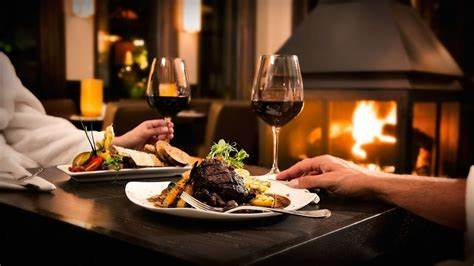

Restaurant ratings in Mexico by real consumers from 2012, including additional information about each restaurant and their cuisines, and each consumer and their preferences.

### **Analysis Objective:**

Analyze the restuarants data and customer data and find out information about customer preferences, demographics, information of highest rating restuarants and why they are the highest rated, demand and suppy gap in the market that can be exploited, etc.

In [1]:
# Import useful python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the restaurants

restaurants = pd.read_csv("/content/restaurants.csv")

print(restaurants.shape)

restaurants.head(3)

(130, 14)


,Restaurant_ID,Name,City,State,Country,Zip_Code,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking
0,132560,Puesto de Gorditas,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.752304,-99.166913,None,Yes,Low,No,Open,Public
1,132561,Cafe Ambar,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.726819,-99.126506,None,No,Low,No,Closed,None
2,132564,Church's,Ciudad Victoria,Tamaulipas,Mexico,NaN,23.730925,-99.145185,None,No,Low,No,Closed,None


In [3]:
# Import the consumers  data

consumers = pd.read_csv("/content/consumers.csv")

print(consumers.shape)

consumers.head(3)


(138, 14)


,Consumer_ID,City,State,Country,Latitude,Longitude,Smoker,Drink_Level,Transportation_Method,Marital_Status,Children,Age,Occupation,Budget
0,U1001,San Luis Potosi,San Luis Potosi,Mexico,22.139997,-100.978803,No,Abstemious,On Foot,Single,Independent,23,Student,Medium
1,U1002,San Luis Potosi,San Luis Potosi,Mexico,22.150087,-100.983325,No,Abstemious,Public,Single,Independent,22,Student,Low
2,U1003,San Luis Potosi,San Luis Potosi,Mexico,22.119847,-100.946527,No,Social Drinker,Public,Single,Independent,23,Student,Low


In [4]:
# Import restaurant cusines data


cuisines = pd.read_csv("/content/restaurant_cuisines.csv")


print(cuisines.shape)

cuisines.head(3)

(112, 2)


,Restaurant_ID,Cuisine
0,132560,Regional
1,132572,Cafeteria
2,132583,American


In [5]:
# Import customer preferences data

consumer_pref = pd.read_csv("/content/consumer_preferences.csv")
print(consumer_pref.shape)

consumer_pref.head(3)

(330, 2)


,Consumer_ID,Preferred_Cuisine
0,U1001,American
1,U1002,Mexican
2,U1003,Mexican


In [6]:
# Import customer preferences data

ratings = pd.read_csv("/content/ratings.csv")
print(ratings.shape)

ratings.head(3)

(1161, 5)


,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


## **Data Cleaning**

In [7]:
# Check all the data for null values and clean datasets
# Restuarants

print(f"Number of duplicate records in data: {restaurants.duplicated().sum()}\n")

print(f"Sum of missing data for each field: \n{restaurants.isnull().sum()}Br/")

Number of duplicate records in data: 0

Sum of missing data for each field: 
Restaurant_ID       0
Name                0
City                0
State               0
Country             0
Zip_Code           74
Latitude            0
Longitude           0
Alcohol_Service     0
Smoking_Allowed     0
Price               0
Franchise           0
Area                0
Parking             0
dtype: int64Br/


for the same of this analysis, the zip_code field is not important to me hence, I will drop that column to get a clean restuarants data.

In [8]:
# Drop zip_code

restaurants.drop(columns='Zip_Code', inplace=True)

# Get a summary statistics of the dataset

restaurants.describe()

,Restaurant_ID,Latitude,Longitude
count,130.000000,130.000000,130.000000
mean,134012.784615,21.858863,-100.342933
std,1140.644582,1.496830,0.860585
min,132560.000000,18.859803,-101.028600
25%,132831.000000,22.139574,-100.987838
50%,134994.000000,22.149063,-100.956777
75%,135050.750000,22.160125,-99.220458
max,135109.000000,23.760268,-99.126506


In [9]:

# Check all the data for null values and clean datasets
# Consumers

print(f"Number of duplicate records in data: {consumers.duplicated().sum()}\n")

print(f"Sum of missing data for each field: \n{consumers.isnull().sum()}")

Number of duplicate records in data: 0

Sum of missing data for each field: 
Consumer_ID               0
City                      0
State                     0
Country                   0
Latitude                  0
Longitude                 0
Smoker                    3
Drink_Level               0
Transportation_Method     7
Marital_Status            4
Children                 11
Age                       0
Occupation                7
Budget                    7
dtype: int64


Thew consumers dataset shows some missing data in fields like smoker, transaportation_method, etc. For the sake of this analysis, I would do a forward fill. However, in real world data, it woud be advisible to find out the reason for the missing data, if it can be gotten, impute the missing data sets or analyze the data excluding null values. Any of these methods could be used depending on the best methid case scenario.

In [10]:
# Forward fill missing cosnumer data

consumers.ffill(inplace = True)

In [11]:
# Check all the data for null values and clean datasets
# cuisines

print(f"Number of duplicate records in data: {cuisines.duplicated().sum()}\n")

print(f"Sum of missing data for each field: \n{cuisines.isnull().sum()}")

Number of duplicate records in data: 0

Sum of missing data for each field: 
Restaurant_ID    0
Cuisine          0
dtype: int64


In [12]:
# Check all the data for null values and clean datasets
# consumer_preferences

print(f"Number of duplicate records in data: {consumer_pref.duplicated().sum()}\n")

print(f"Sum of missing data for each field: \n{consumer_pref.isnull().sum()}")

Number of duplicate records in data: 2

Sum of missing data for each field: 
Consumer_ID          0
Preferred_Cuisine    0
dtype: int64


In [13]:
# Print row with duplicate data

consumer_pref[consumer_pref.duplicated()]

,Consumer_ID,Preferred_Cuisine
276,U1135,Pacific
320,U1135,Asian


The above shows the customer has more tan 1 preference, hence we will clean up this data so that all customers can have only 1 preference

In [14]:
# Drop duplicates

consumer_pref.drop_duplicates(inplace=True)

In [15]:
# Check all the data for null values and clean datasets
# ratings

print(f"Number of duplicate records in data: {ratings.duplicated().sum()}\n")

print(f"Sum of missing data for each field: \n{ratings.isnull().sum()}")

Number of duplicate records in data: 0

Sum of missing data for each field: 
Consumer_ID       0
Restaurant_ID     0
Overall_Rating    0
Food_Rating       0
Service_Rating    0
dtype: int64


## **Exploratory Data Analyis**




In [16]:
# HGet a data type pf each column of the data

restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant_ID    130 non-null    int64  
 1   Name             130 non-null    object 
 2   City             130 non-null    object 
 3   State            130 non-null    object 
 4   Country          130 non-null    object 
 5   Latitude         130 non-null    float64
 6   Longitude        130 non-null    float64
 7   Alcohol_Service  130 non-null    object 
 8   Smoking_Allowed  130 non-null    object 
 9   Price            130 non-null    object 
 10  Franchise        130 non-null    object 
 11  Area             130 non-null    object 
 12  Parking          130 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 13.3+ KB


### Demographics Restaurants/ Consumers

In [17]:
# What is the location of most restaurants in Mexico that participarted in this survey

restaurants[['City']].value_counts()

City           
San Luis Potosi    84
Ciudad Victoria    23
Cuernavaca         21
Jiutepec            2
dtype: int64

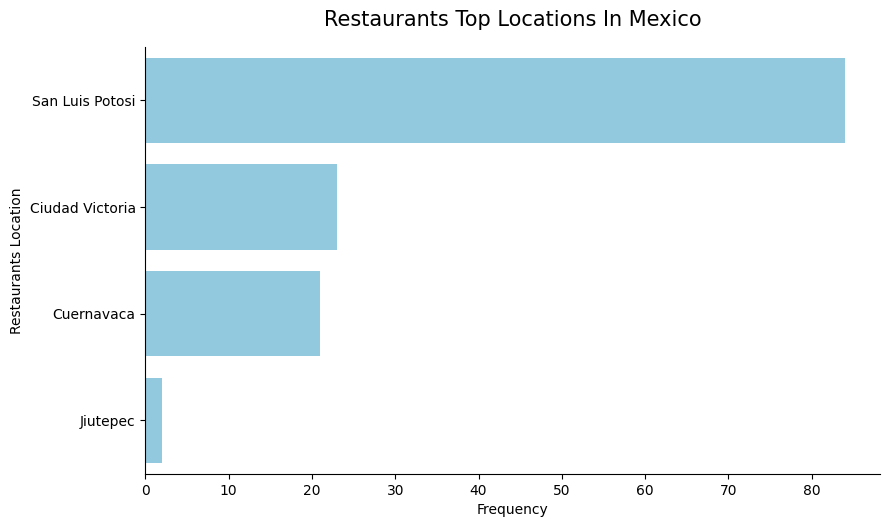

In [18]:
# Top restaurants location

res_plot = restaurants[['City']].value_counts().reset_index(name = 'Counts')

sns.catplot(y= 'City', x='Counts', data=res_plot, kind='bar', color='skyblue', aspect = 1.8)
plt.title("Restaurants Top Locations In Mexico", size=15, y=1.03)
plt.ylabel("Restaurants Location", size = 10)
plt.xlabel("Frequency", size = 10)
sns.color_palette("mako", as_cmap=True)
plt.show()

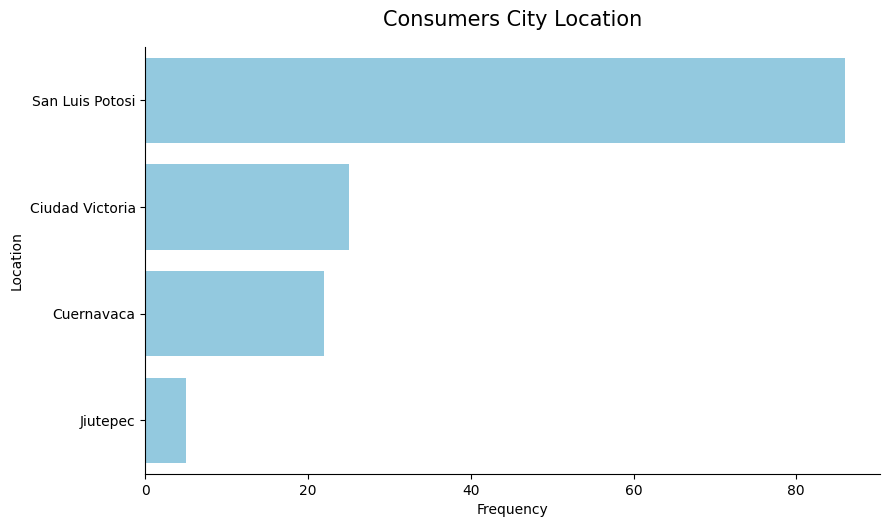

In [19]:
# Consumers location

consumer_loc = consumers[['City']].value_counts().reset_index(name = 'Counts')

sns.catplot(y= 'City', x='Counts', data= consumer_loc, kind='bar', color='skyblue', aspect = 1.8)
plt.title("Consumers City Location", size=15, y=1.03)
plt.ylabel("Location", size = 10)
plt.xlabel("Frequency", size = 10)
sns.color_palette("mako", as_cmap=True)
plt.show()

### Restaurants pricing

In [20]:
# Smoking_Allowed how many categories do we have
restaurants['Smoking_Allowed'].value_counts()

No                 95
Smoking Section    24
Yes                 9
Bar Only            2
Name: Smoking_Allowed, dtype: int64

The above shows that some majority of trhe restaurants does not allow smoking. Let us see how this affects the pricing of the restaurant.

I will convert all the categories into 2. Yes or No. Anything order than No would be changed to yes.

In [21]:
# Convert all categories not No to yes
restaurants['Smoking_Allowed'] = np.where(restaurants['Smoking_Allowed'] == 'No', 'No', 'Yes')

# Confirm grouping

restaurants['Smoking_Allowed'].value_counts()

No     95
Yes    35
Name: Smoking_Allowed, dtype: int64

In [22]:
# Restaurants pricing rates

restaurants['Price'].value_counts()

Medium    60
Low       45
High      25
Name: Price, dtype: int64

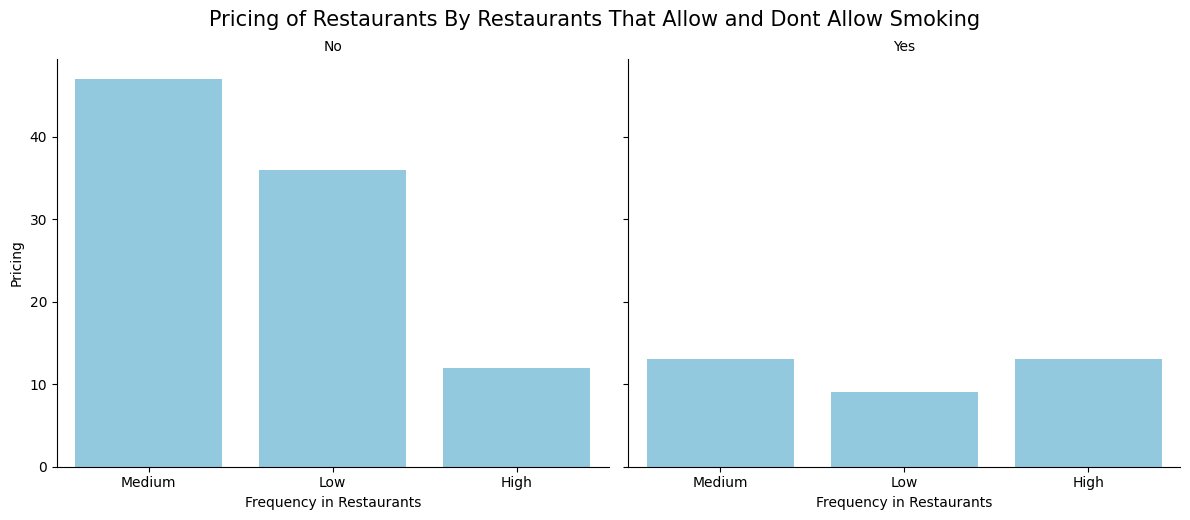

In [23]:
# Pricing of Most Restaurants based on if they allow smoking or not.
restaurants_price = restaurants.groupby('Price', as_index = False)['Smoking_Allowed'].value_counts().sort_values(by='count', ascending=False)


g = sns.catplot(x= 'Price', y= 'count', data=restaurants_price, kind='bar', col='Smoking_Allowed', color='skyblue', aspect = 1.2)
g.fig.suptitle("Pricing of Restaurants By Restaurants That Allow and Dont Allow Smoking", size=15, y=1.03)
g.set_titles("{col_name}")
g.set_axis_labels(x_var="Frequency in Restaurants", y_var="Pricing")
plt.show()

It is evident from the above plots that the restaurants that does not allow smoking are higher and the number of restaurants that allows smoking.

It can also be seen that for restaurants that does not allow smoking, their price mostly ranges from medium to high. WHile restaurants that does not allow smoking, majority of their prices are mdeium followed by low before high.

In [24]:
restaurants['Alcohol_Service'].value_counts()

None           87
Wine & Beer    34
Full Bar        9
Name: Alcohol_Service, dtype: int64

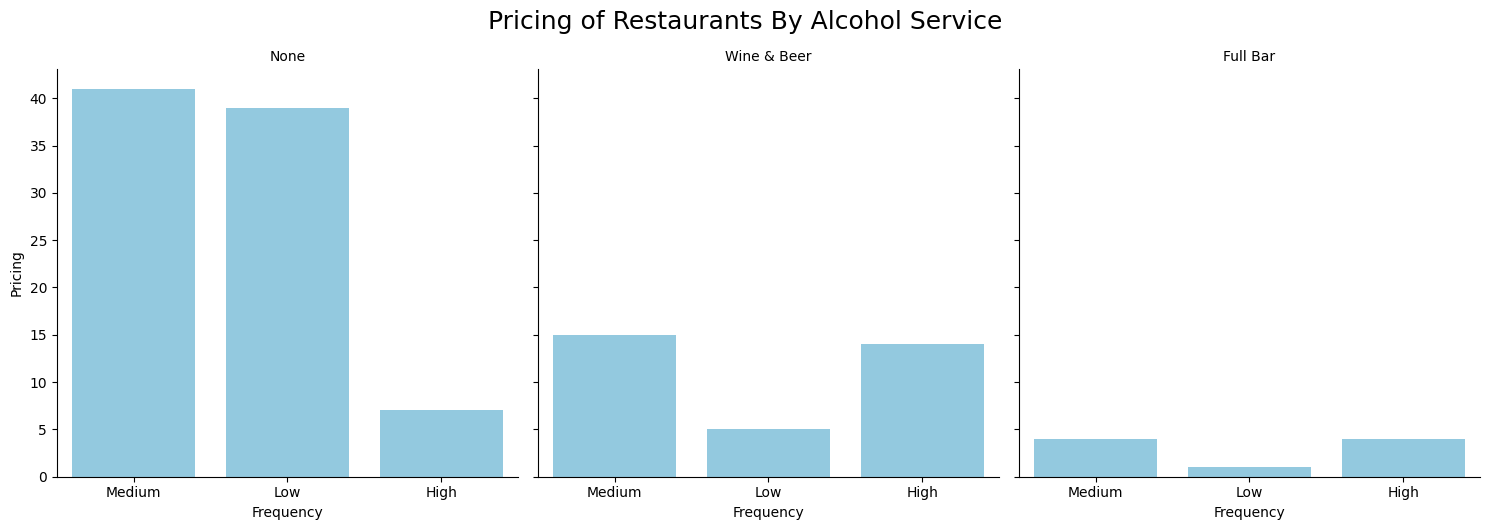

In [25]:
# Pricing of Most Restaurants based on if they sell alcohol or not (Full bar or Wine % Beer)
restaurants_alc = restaurants.groupby('Price', as_index = False)['Alcohol_Service'].value_counts().sort_values(by='count', ascending=False)


g = sns.catplot(x= 'Price', y= 'count', data= restaurants_alc, kind='bar', col='Alcohol_Service', color='skyblue', aspect = 1.0)
g.fig.suptitle("Pricing of Restaurants By Alcohol Service", size=18, y=1.05)
g.set_titles("{col_name}")
g.set_axis_labels(x_var="Frequency", y_var="Pricing")
plt.show()

In [26]:
# Restaurants parking

restaurants['Parking'].value_counts()

None      65
Yes       46
Public    16
Valet      3
Name: Parking, dtype: int64

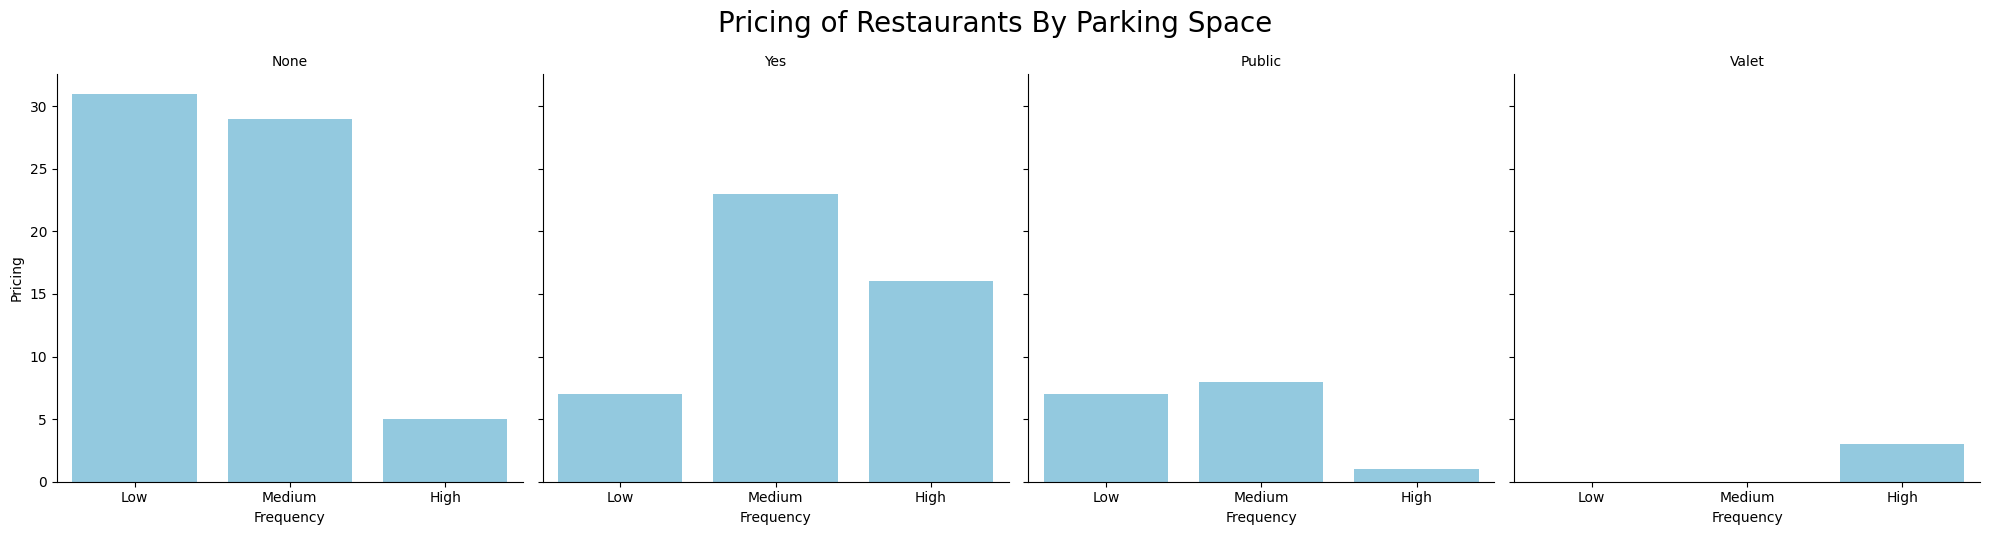

In [27]:
# Pricing of Most Restaurants based on if they have a pparking space and type of parking space available
restaurants_parking = restaurants.groupby('Price', as_index = False)['Parking'].value_counts().sort_values(by='count', ascending=False)

g = sns.catplot(x= 'Price', y= 'count', data=restaurants_parking, kind='bar', col='Parking', color='skyblue', aspect = 1.0)
g.fig.suptitle("Pricing of Restaurants By Parking Space", size=20, y=1.06)
g.set_titles("{col_name}")
g.set_axis_labels(x_var="Frequency", y_var="Pricing")
plt.show()

The plot above indicates that parking space availability is one of the things that affects pricing of restaurants.
* Valet parking even though only few restaurants have this type of parking shows that, any restaurant with valet parking have a pricing food menu too.
*The restaurants with normal parking space also seem to have mostly medium to high food menu.
*The restaurants with no parking space at all has the highest affordable food menu


### Cusines

In [28]:
# What are the top cuisines made by the restaurants

rest_cuisines =  restaurants.merge(cuisines, how='inner', on='Restaurant_ID')

print(rest_cuisines.shape)


(112, 14)


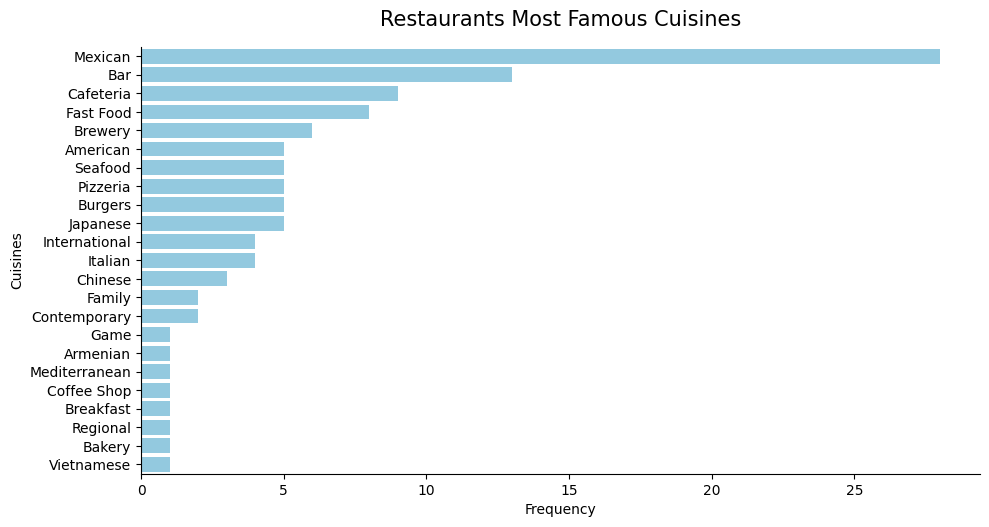

In [29]:
cuisines_plot = rest_cuisines[['Cuisine']].value_counts().reset_index(name='Frequency')

sns.catplot(y= 'Cuisine', x='Frequency', data=cuisines_plot, kind='bar', color='skyblue', aspect = 2.0)
plt.title("Restaurants Most Famous Cuisines", size=15, y=1.03)
plt.ylabel("Cuisines", size = 10)
plt.xlabel("Frequency", size = 10)
sns.color_palette("mako", as_cmap=True)
plt.show()

In [30]:
# Most Preferred Cuisines by consumers

# Merge consumers data to their preferred cuisines
preferred_cuisines = consumers.merge(consumer_pref, on='Consumer_ID', how='inner')

cuisines_plot = preferred_cuisines[['Preferred_Cuisine']].value_counts().reset_index(name='Frequency')

cuisines_plot.head()

,Preferred_Cuisine,Frequency
0,Mexican,97
1,American,11
2,Cafeteria,9
3,Pizzeria,9
4,Family,8


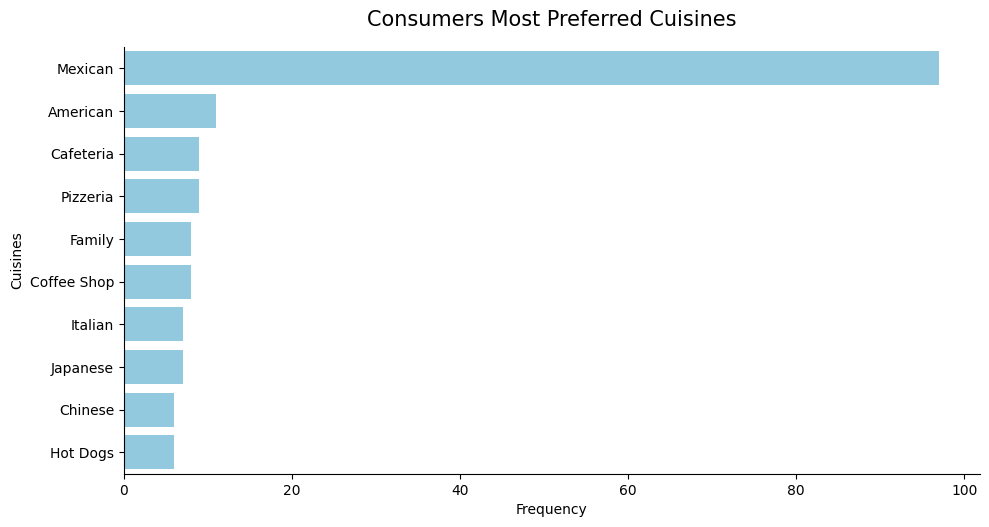

In [31]:
# Plot top 5 most preferred cuisines

sns.catplot(y= 'Preferred_Cuisine', x='Frequency', data=cuisines_plot.head(10), kind='bar', color='skyblue', aspect = 2.0)
plt.title("Consumers Most Preferred Cuisines", size=15, y=1.03)
plt.ylabel("Cuisines", size = 10)
plt.xlabel("Frequency", size = 10)
sns.color_palette("mako", as_cmap=True)
plt.show()

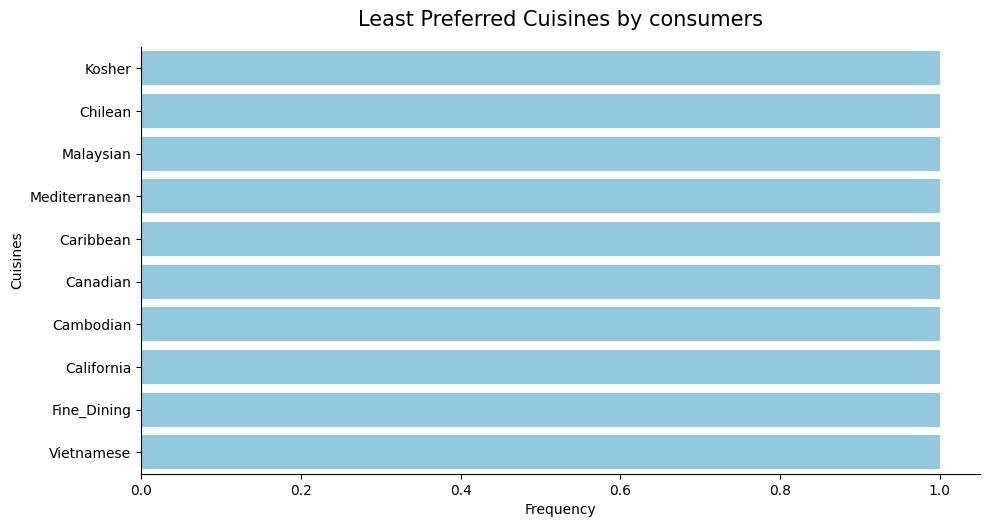

In [32]:
# Plot Leat 5  preferred cuisines

sns.catplot(y= 'Preferred_Cuisine', x='Frequency', data=cuisines_plot.tail(10), kind='bar', color='skyblue', aspect = 2.0)
plt.title("Least Preferred Cuisines by consumers", size=15, y=1.03)
plt.ylabel("Cuisines", size = 10)
plt.xlabel("Frequency", size = 10)
sns.color_palette("mako", as_cmap=True)
plt.show()

### Ratings

In [33]:
ratings.head(3)

,Consumer_ID,Restaurant_ID,Overall_Rating,Food_Rating,Service_Rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2


In [34]:
# Merge rating data with restaurants data

rating = restaurants.merge(ratings, on='Restaurant_ID', how='inner')

rating.shape

(1161, 17)

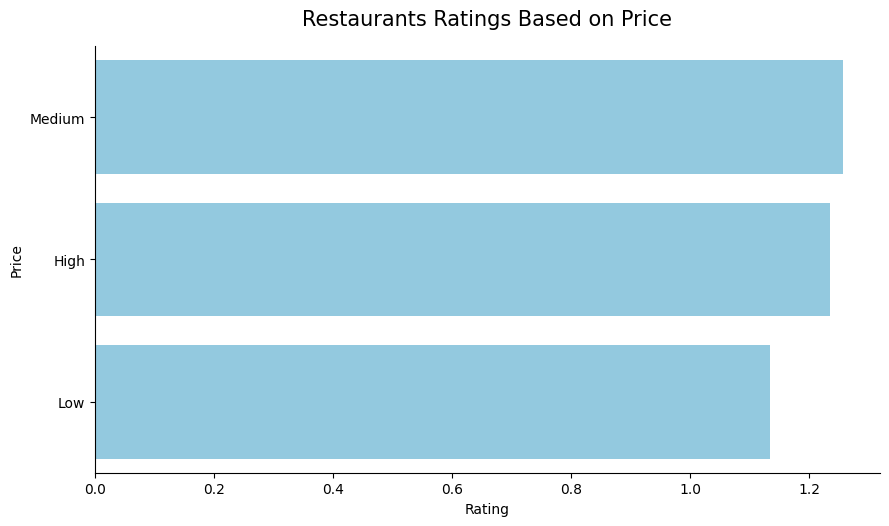

In [35]:
# Consumers food rating based on price


food_rating = rating.groupby('Price', as_index = False)['Food_Rating'].mean().sort_values(by='Food_Rating', ascending=False)
sns.catplot(y='Price', x = 'Food_Rating', data=food_rating, kind='bar', color='skyblue', aspect = 1.8)
plt.title("Restaurants Ratings Based on Price", size=15, y=1.03)
plt.ylabel("Price", size = 10)
plt.xlabel("Rating", size = 10)
plt.show()

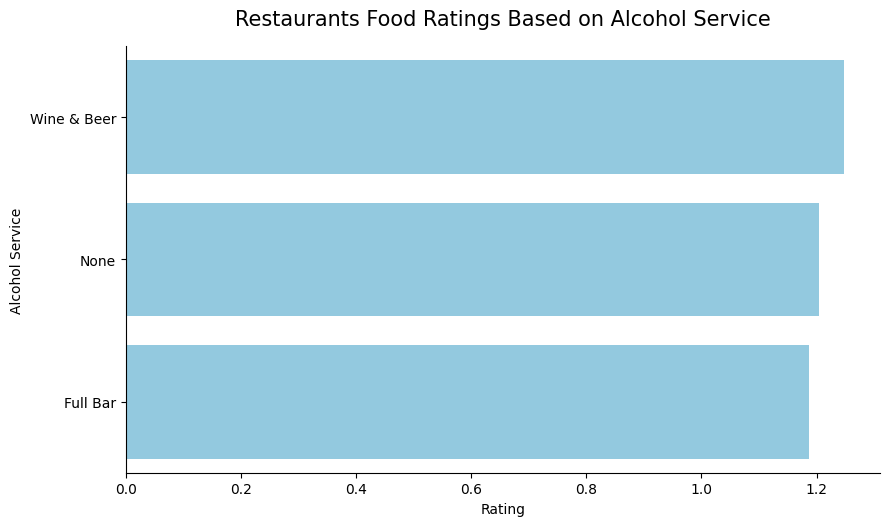

In [36]:
# Consumers food rating based on Acohol Service


alco_food_rating = rating.groupby('Alcohol_Service', as_index = False)['Food_Rating'].mean().sort_values(by='Food_Rating', ascending=False)
sns.catplot(y='Alcohol_Service', x = 'Food_Rating', data=alco_food_rating, kind='bar', color='skyblue', aspect = 1.8)
plt.title("Restaurants Food Ratings Based on Alcohol Service", size=15, y=1.03)
plt.ylabel("Alcohol Service", size = 10)
plt.xlabel("Rating", size = 10)
plt.show()

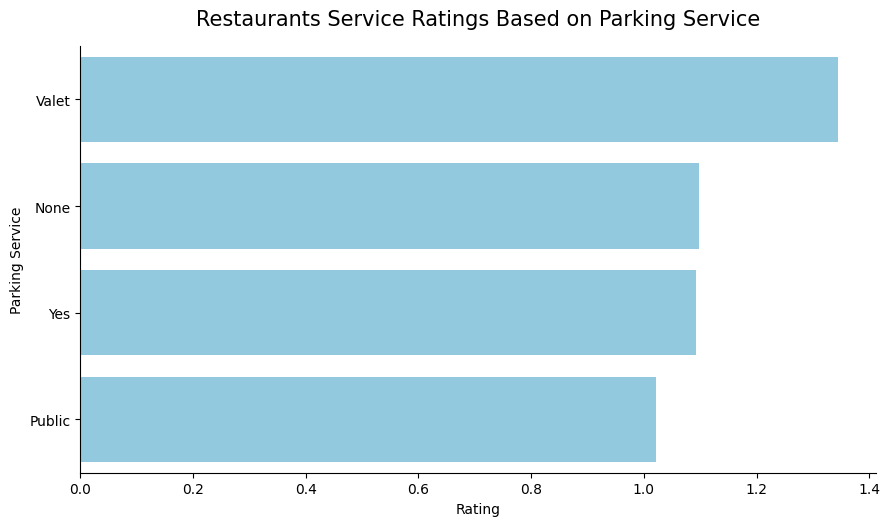

In [37]:
# Consumers food rating based on Parking Service


service_rating = rating.groupby('Parking', as_index = False)['Service_Rating'].mean().sort_values(by='Service_Rating', ascending=False)
sns.catplot(y='Parking', x = 'Service_Rating', data=service_rating, kind='bar', color='skyblue', aspect = 1.8)
plt.title("Restaurants Service Ratings Based on Parking Service", size=15, y=1.03)
plt.ylabel("Parking Service", size = 10)
plt.xlabel("Rating", size = 10)
plt.show()

The above charts show that valet parking as the overall best service rating. Compared to the pricing, recall that all restaurants with valet parking food princing is high. This shows that one of the factors that affects rating isthe kind of service consumers are given.

However, in terms of food rating, restaurants with medium price had the highest rating. This suggest that quality service does not necssarily mean best food rating. Although restaurants with high food pricing has a significant good rating with very slight difference with medium price restaurants

### Highest Rated Restaurants

The highest rating a consumer can give a restaurant is 2

* 0 - Unsatisfactory
* 1 - Satisfactory
* 2 - Highly Satisfactory

> Let us run a quick analysis on these restaurants to see what they are doing differently.

In [38]:
# Top rating restaurants

top_rated = rating[rating['Overall_Rating']==2]

top_rated.shape

(486, 17)

In [39]:
top_rated.head(3)

,Restaurant_ID,Name,City,State,Country,Latitude,Longitude,Alcohol_Service,Smoking_Allowed,Price,Franchise,Area,Parking,Consumer_ID,Overall_Rating,Food_Rating,Service_Rating
8,132564,Church's,Ciudad Victoria,Tamaulipas,Mexico,23.730925,-99.145185,None,No,Low,No,Closed,None,U1060,2,2,2
13,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,22.141647,-100.992712,None,No,Low,No,Closed,Yes,U1055,2,2,2
14,132572,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,22.141647,-100.992712,None,No,Low,No,Closed,Yes,U1083,2,2,2


In [40]:
# Top rated general parking

top_rated['Parking'].value_counts()

None      238
Yes       164
Public     69
Valet      15
Name: Parking, dtype: int64

In [41]:
# Top Rated smoking allowed or not

top_rated['Smoking_Allowed'].value_counts()

No     348
Yes    138
Name: Smoking_Allowed, dtype: int64

In [42]:
# Top rated alcohol service

top_rated['Alcohol_Service'].value_counts()

None           303
Wine & Beer    146
Full Bar        37
Name: Alcohol_Service, dtype: int64

In [43]:
# Top rated Franchise or not


top_rated['Franchise'].value_counts()

No     421
Yes     65
Name: Franchise, dtype: int64

In [44]:
# Top rated restaurants ares open or closed


top_rated['Area'].value_counts()

Closed    438
Open       48
Name: Area, dtype: int64

The above data of the restaurants with the highest ratings shows they are mostly restauarants in an enclosed area. These restaurants are mostly not franchised which suggest more attention to details by the owner and more independence in terms of taste and choice of how to run the restaurants.

Recommendations:

1. Comparing restaurants most prepared cuisines to consumers most preferred cuisines, the charts shows that consumers second most preferred cuisines is American foods. However, this came 5th position under restaurants most prepared. This could be a hidden market to explore seeing that consumers after Mexican dishes, love American foods as well.

2. Quality service is important to consumers so as much as you can train staff to deliver quality service to the customers whether you you have valet parking or not. This generally helps consumers feel appreciated/valued.

3. Restaurants should add more American cuisines to their menu to increase consumers turnover as more consumers indicated American food as their second most preferred cuisine.

